In [40]:
import argparse
import sys
sys.path.append('../../image/modified')
sys.path.append('../../video')

from dataset import lmdb_ffhq
from dataloader import video_mnist_dataloader
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

from torchvision import utils

from tqdm import tqdm

from m_vqvae_multi_level8 import VQVAE_ML
from torch import optim, nn
import matplotlib.pyplot as plt
import numpy as np

In [11]:
ffhq_path = "/home/stipendiater/mohamadi/vp/video/datasets/ffhq"
lmdb_path = ffhq_path + 'ffhq_lmdb'
in_channel = 3
run_num = "64*2_512dim_2"
checkpoint_num = 4
batch_size = 2
lr = 0.0001
device = 'cuda'
epoch_num = 300
image_samples = 4
channel = 512
n_res_block = 12
n_res_channel =512
embed_dim=512
n_level = 64
n_embed = 2


In [39]:
dataset = lmdb_ffhq(lmdb_path)
loader = video_mnist_dataloader(dataset, batch_size, shuffle=True, num_workers=4, drop_last=True)


In [ ]:
model = VQVAE_ML(
            in_channel=in_channel,
            channel=channel,
            n_res_block=n_res_block,
            n_res_channel=n_res_channel,
            embed_dim=embed_dim,
            n_level=n_level,
            n_embed=n_embed,
            decay=0.99).to(device)

embeds = []
for quantize in model.quantizes:
    embeds.append(quantize.embed)

    
model = model.to(device)

model = nn.DataParallel(model,device_ids=[0, 1])

model.load_state_dict(torch.load(f"checkpoints/{run_num}/{str(checkpoint_num).zfill(4)}.pt"))

model.eval()

In [41]:
embeds = []
for quantize in model.module.quantizes: 
    embeds.append([torch.norm(em).detach().cpu().numpy() for em in quantize.embed.view(n_embed,512)])

In [42]:
ave_embeds = []
for embed in embeds:
    ave_embeds.append(sum(embed)/2)

In [43]:
ave_embeds

[2.0449057817459106,
 0.3211382329463959,
 0.17545536160469055,
 0.17408806085586548,
 0.11367732658982277,
 0.09442625194787979,
 0.09448200836777687,
 0.10324230790138245,
 0.11971492692828178,
 0.08884992450475693,
 0.0724763311445713,
 0.07544785365462303,
 0.06218920461833477,
 0.06147116981446743,
 0.4873338043689728,
 0.05797293968498707,
 0.06048477999866009,
 0.059547554701566696,
 0.05541463755071163,
 0.05327914096415043,
 0.04944716393947601,
 0.04776238650083542,
 0.04664416238665581,
 0.04848317988216877,
 0.04273846559226513,
 0.04522610269486904,
 0.0418136864900589,
 0.041400883346796036,
 0.04001071862876415,
 0.038876621052622795,
 0.0372366476804018,
 0.03783954121172428,
 0.03498556651175022,
 0.035724226385354996,
 0.0342826172709465,
 0.034371692687273026,
 0.03278442099690437,
 0.49928244948387146,
 0.0320814847946167,
 0.03232508711516857,
 0.0325118750333786,
 0.03034625295549631,
 0.3961022198200226,
 0.27532006800174713,
 0.030773624777793884,
 0.03000736143

<BarContainer object of 64 artists>

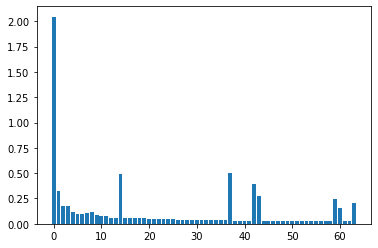

In [44]:
x = np.arange(0,n_level)
plt.bar(x,ave_embeds)

In [2]:
ave_embeds

NameError: name 'ave_embeds' is not defined

In [37]:
with torch.no_grad():
    for iter_, img in enumerate(loader):
        if iter_ < 10:
            model.zero_grad()
            img = img.to(device)
            out, latent_loss = model(img)


In [24]:
a = np.array([2.0449057817459106,
 0.3211382329463959,
 0.17545536160469055,
 0.17408806085586548,
 0.11367732658982277,
 0.09442625194787979,
 0.09448200836777687,
 0.10324230790138245,
 0.11971492692828178,
 0.08884992450475693,
 0.0724763311445713,
 0.07544785365462303,
 0.06218920461833477,
 0.06147116981446743,
 0.4873338043689728,
 0.05797293968498707,
 0.06048477999866009,
 0.059547554701566696,
 0.05541463755071163,
 0.05327914096415043,
 0.04944716393947601,
 0.04776238650083542,
 0.04664416238665581,
 0.04848317988216877,
 0.04273846559226513,
 0.04522610269486904,
 0.0418136864900589,
 0.041400883346796036,
 0.04001071862876415,
 0.038876621052622795,
 0.0372366476804018,
 0.03783954121172428,
 0.03498556651175022,
 0.035724226385354996,
 0.0342826172709465,
 0.034371692687273026,
 0.03278442099690437,
 0.49928244948387146,
 0.0320814847946167,
 0.03232508711516857,
 0.0325118750333786,
 0.03034625295549631,
 0.3961022198200226,
 0.27532006800174713,
 0.030773624777793884,
 0.03000736143440008,
 0.03030216135084629,
 0.029208975844085217,
 0.027773401699960232,
 0.02704911958426237,
 0.027482799254357815,
 0.02677431982010603,
 0.02563281450420618,
 0.025736468844115734,
 0.02504725754261017,
 0.024716727435588837,
 0.024185444228351116,
 0.023882726207375526,
 0.023228004574775696,
 0.24177027493715286,
 0.15393034368753433,
 0.02361557073891163,
 0.024205626919865608,
 0.20479073375463486])

In [18]:
a.mean()

0.11583295121090487

In [15]:
a.sum()

7.4133088774979115

In [19]:
a.absolute()

AttributeError: 'numpy.ndarray' object has no attribute 'absolute'

In [38]:
np.linalg.norm(a, ord=2) 

5.0

In [41]:
b = a+1

In [42]:
b

array([3.04490578, 1.32113823, 1.17545536, 1.17408806, 1.11367733,
       1.09442625, 1.09448201, 1.10324231, 1.11971493, 1.08884992,
       1.07247633, 1.07544785, 1.0621892 , 1.06147117, 1.4873338 ,
       1.05797294, 1.06048478, 1.05954755, 1.05541464, 1.05327914,
       1.04944716, 1.04776239, 1.04664416, 1.04848318, 1.04273847,
       1.0452261 , 1.04181369, 1.04140088, 1.04001072, 1.03887662,
       1.03723665, 1.03783954, 1.03498557, 1.03572423, 1.03428262,
       1.03437169, 1.03278442, 1.49928245, 1.03208148, 1.03232509,
       1.03251188, 1.03034625, 1.39610222, 1.27532007, 1.03077362,
       1.03000736, 1.03030216, 1.02920898, 1.0277734 , 1.02704912,
       1.0274828 , 1.02677432, 1.02563281, 1.02573647, 1.02504726,
       1.02471673, 1.02418544, 1.02388273, 1.023228  , 1.24177027,
       1.15393034, 1.02361557, 1.02420563, 1.20479073])

In [43]:
mse = (np.square(a - b)).mean(axis=ax)

NameError: name 'ax' is not defined

In [55]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(a, b)
mse2 = mean_squared_error(np.linalg.norm(a, ord=2) , np.linalg.norm(a, ord=2))

TypeError: Singleton array 2.3092489878341564 cannot be considered a valid collection.

In [49]:
mse1

1.0

In [50]:
mse2

1.7966212353319366

In [51]:
mse1/mse2

0.5566003453227825

In [52]:
c = a + \
b

In [58]:
m = np.linalg.norm(a, ord=2)
n = np.linalg.norm(b, ord=2)

In [59]:
m

2.3092489878341564

In [60]:
n

9.173835001939423

In [61]:
mean_squared_error(m, n)

TypeError: Singleton array 2.3092489878341564 cannot be considered a valid collection.